In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml # mnist datasetini yüklemek için gerekli
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
mnist = fetch_openml("mnist_784")

In [3]:
print(mnist.data.shape)

(70000, 784)


In [4]:
def showimage(dframe, index):
    some_digit = dframe.to_numpy()[index]
    some_digit_image = some_digit.reshape(28,28)
    
    plt.imshow(some_digit_image, cmap = "binary")
    plt.axis("off")
    plt.show()

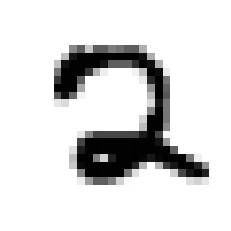

In [15]:
showimage(mnist.data, 46585)

In [10]:
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [11]:
print(type(train_img))

<class 'pandas.core.frame.DataFrame'>


In [16]:
test_img_copy = test_img.copy() 

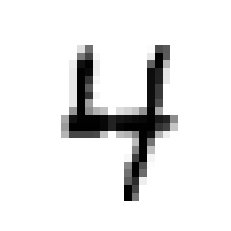

In [25]:
showimage(test_img_copy, 1)

In [26]:
# Verilerimizi scale etmemiz gerekiyor.
# çünkü PCA scale edilmemiş verilerde hatalı sonuçlar verebiliyor.
scaler = StandardScaler()

# scaler'ı sadece training seti üzerinde fit yapmamız yeterli.
scaler.fit(train_img)

# ama transform işlemini hem training hem de test'e yapmamız gerekiyor.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [27]:
# PCA işlemini uyguluyoruz
# variance'ın 95% oranında korunmasını istediğimizi belirtiyoruz.
pca = PCA(.95)

# PCA'i sadece training sete yapmamız yeterli
pca.fit(train_img)

PCA(n_components=0.95)

In [28]:
# Bakalım 784 boyutu kaç boyuta düşürebilmiş(%95 variance'ı koruyarak)
print(pca.n_components_)

327


In [29]:
# Şimdi transform işlemiyle hem train hem de test veri setimizin boyutlarını 784'ten 327'ye düşürelim
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [30]:
# 2. AŞAMA
# Logistic Regression modelimizi PCA işleminden geçirilmiş veri setimiz üzerine uygulayacağız.
# Default solver çok yavaş çalıştığı için daha hızlı olan "lbfgs" solver'ı seçerek logistikregression nesnemizi oluşturuyoruz.

logisticReg = LogisticRegression(solver = "lbfgs", max_iter=10000)

In [31]:
# Logistic regression modelimizi train datamızı kullanarak eğitiyoruz

# birkaç dk sürebelir
logisticReg.fit(train_img, train_lbl)

LogisticRegression(max_iter=10000)

In [35]:
# Modelimiz eğitildi şimdi el yazısı rakamları makine öğrenmesi ile tanıma işlemini gerçekleştirelim.
logisticReg.predict(test_img[2].reshape(1,-1))

array(['1'], dtype=object)

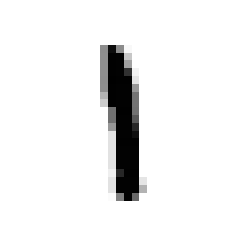

In [36]:
showimage(test_img_copy, 2)

In [37]:
# Modelimizin doğruluk oranını(accuracy) ölçmek
logisticReg.score(test_img, test_lbl)

0.9184